# Introduction

Understanding how students learn as they interact with coursework, called knowledge tracing, is a difficult problem in computer-supported education. 

In this report, I will share my work on tackling this task, including building a model, evaluating its performance, and creating a user-friendly website to explain how my model works.


The application of knowledge tracing includes learning recommendation, Adaptive learning, and Educational gaming.






# Literature review

The issue of knowledge tracing was initially introduced and extensively researched in the intelligent tutoring community. Despite the challenges mentioned earlier, the main objective has been to construct models that may not capture every cognitive process but are still valuable in practice. (Piêce et al., 2015))


Indeed, knowledge tracing models can be broadly categorized into two main categories: (1) Traditional Knowledge Tracing Models, and (2) Deep Learning Knowledge Tracing Models.


(1) Traditionally, there are two popular lines of research for knowledge tracing: the Bayesian Knowledge Tracing and the Factor Analysis Models (or also known as Logistic models and Probabilistic models.

(2) In the implementation and research of Deep learning knowledge tracing model, there are many variants (AKT, DKT, DKT+, SAINT, .etc). Deep Knowledge Tracing (DKT)  pioneered the use of deep learning for knowledge tracing. It employs Recurrent Neural Network (RNN) and Long Short Term Memory (LSTM)to predict the probability of correctly answering a question at each time step. A sequence of hidden states $\langle h_1, h_2, \ldots, h_n \rangle$ is computed, which encodes the sequence information obtained from previous interactions. At each time step $t$, the model calculates the hidden state $h_t$ and the student's response $p_t$ as follows:

\begin{equation}
h_t = \tanh(W_h^x x_t + W_h^h h_{t-1} + b_h)
\end{equation}

\begin{equation}
p_t = \sigma(W_h^y h_t + b_p)
\end{equation}

where $\tanh(u_i) = \frac{e^{u_i} - e^{-u_i}}{e^{u_i} + e^{-u_i}}$ and $\sigma(u_i) = \frac{1}{1 + e^{-u_i}}$ are activation functions, $W_h^x$, $W_h^h$, and $W_h^y$ are weight matrices, and $b_h$ and $b_p$ are bias vectors.



# Model description

In this implementation, I will use Deep Knowledge tracing model, which is known as Vanilla-DKT model, https://stanford.edu/~cpiech/bio/papers/deepKnowledgeTracing.pdf due to the high result for our data ( which is ASSISST2015).

The programming is mostly based on this repo: https://github.com/jarviszhb/KnowledgeTracing

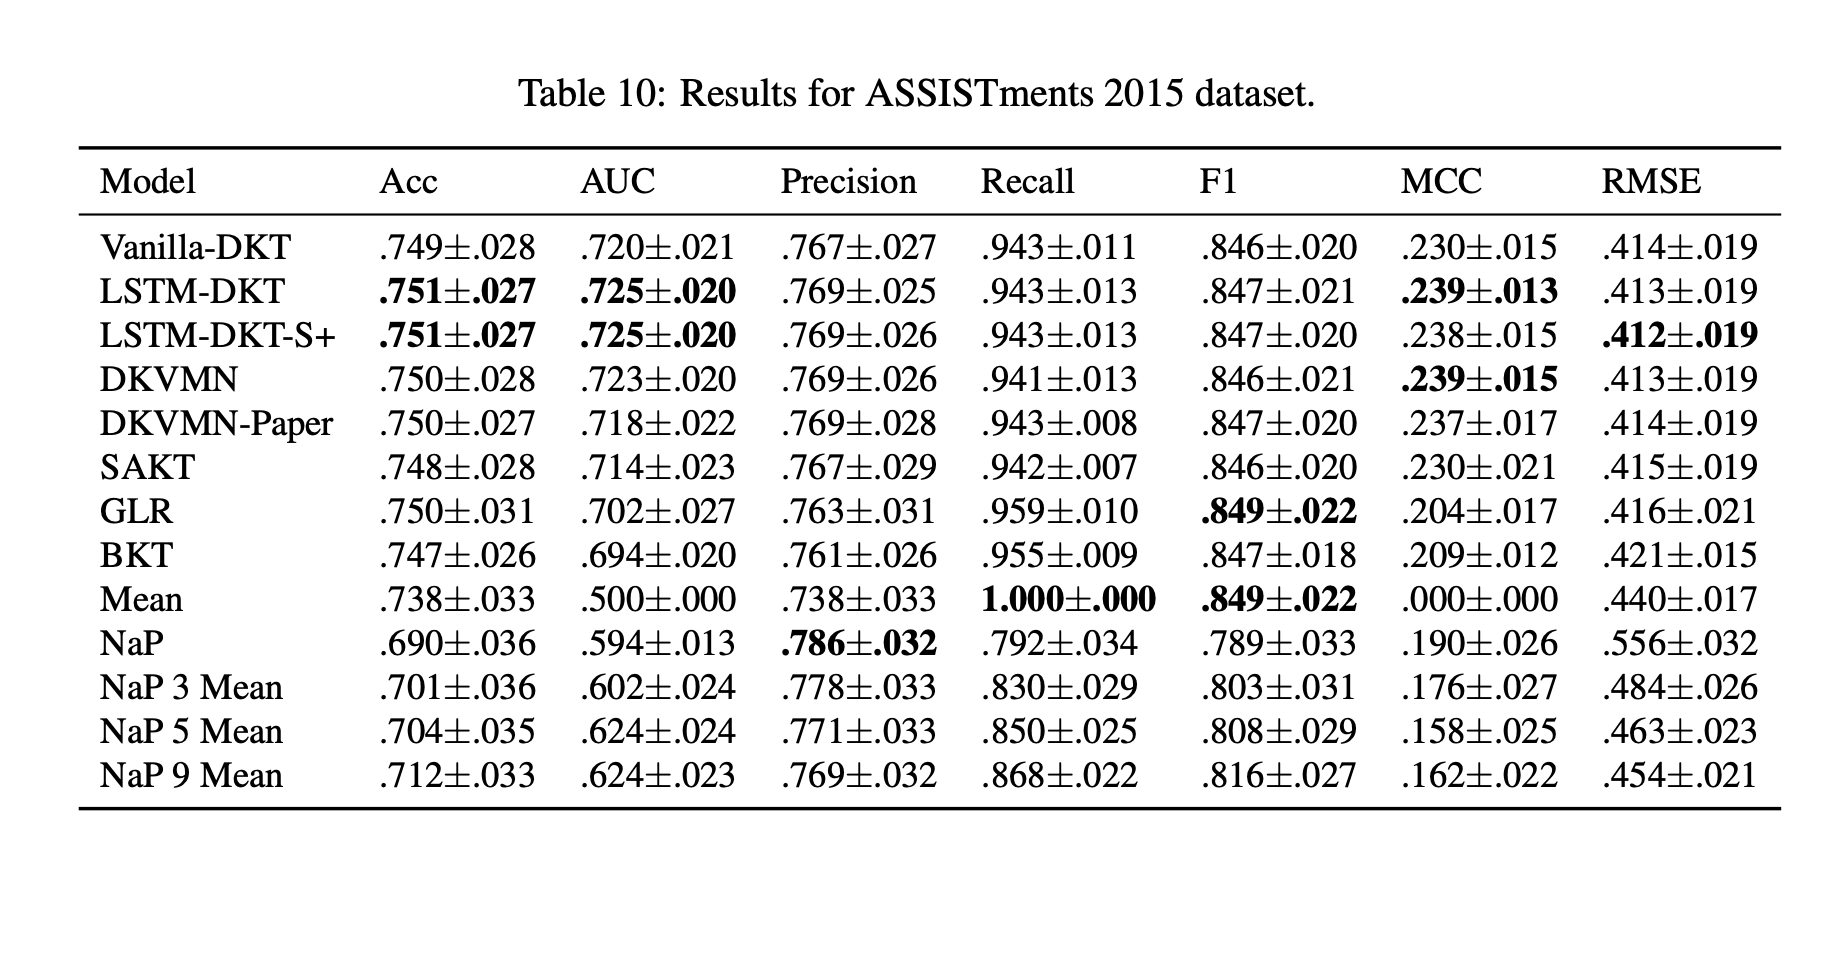 Sources : https://arxiv.org/pdf/2112.15072.pdf

This model utilizes two distinct types of Recurrent Neural Networks (RNNs) – a basic RNN model with sigmoid units and a Long Short Term Memory (LSTM) model – to address the task of forecasting student responses to exercises by considering their previous activity. (Piece et al.)






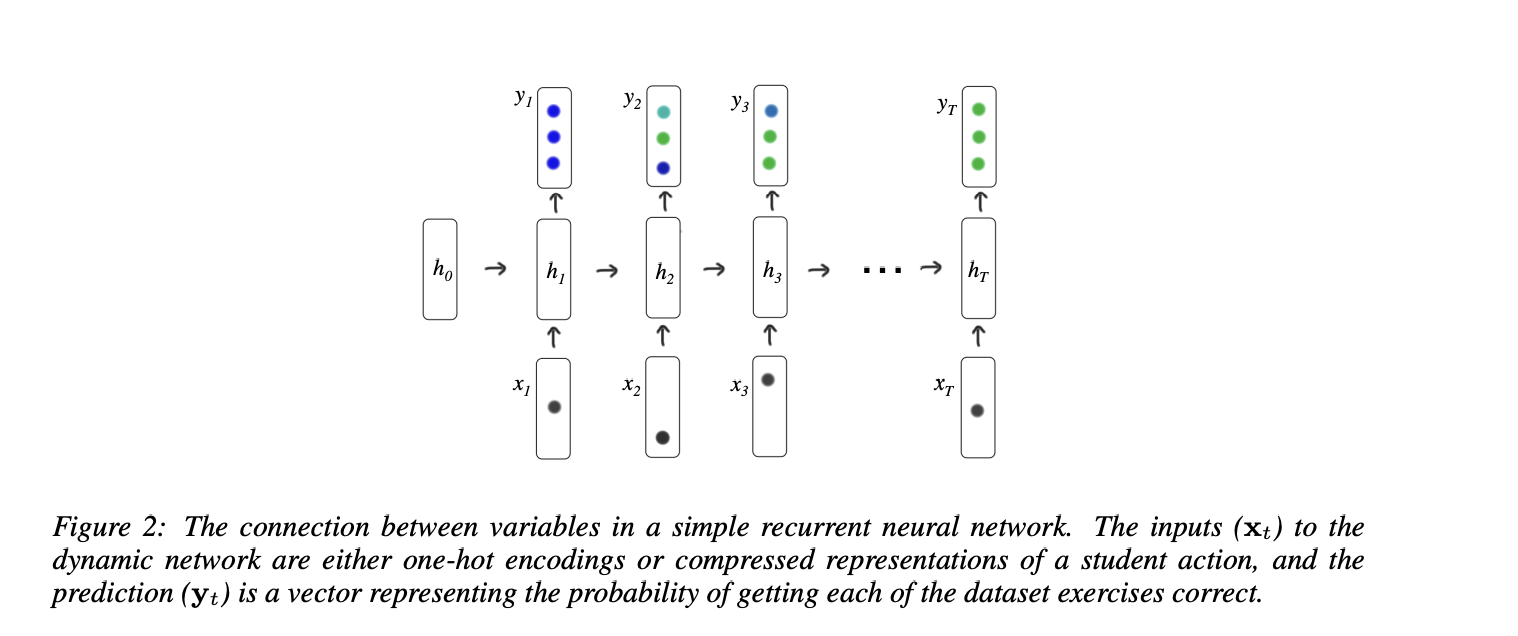 Source : https://stanford.edu/~cpiech/bio/papers/deepKnowledgeTracing.pdf

Traditional Recurrent Neural Networks (RNNs) map an input sequence of vectors $\mathbf{x_1, ..., x_T}$ to an output sequence of vectors $\mathbf{y_1, ..., y_T}$. This is achieved by computing a sequence of 'hidden' states $\mathbf{h_1, ..., h_T}$, which encode relevant information from past observations for future predictions. The relationship between the variables is defined by the following equations:

\begin{equation}
\mathbf{h_t} = \tanh(\mathbf{W_{hx}x_t + W_{hh}h_{t-1} + b_h})
\end{equation}

\begin{equation}
\mathbf{y_t} = \sigma(\mathbf{W_{yh}h_t + b_y})
\end{equation}

In these equations, $\tanh$ and $\sigma$ are applied element-wise. The model parameters include the input weight matrix $\mathbf{W_{hx}}$, recurrent weight matrix $\mathbf{W_{hh}}$, initial state $\mathbf{h_0}$, and readout weight matrix $\mathbf{W_{yh}}$. The biases for latent and readout units are denoted as $b_h$ and $b_y$.

Long Short Term Memory (LSTM) networks [16] are a more advanced variant of RNNs that are often more powerful. LSTMs have the ability to retain information for many time steps by using a 'forget gate' to clear latent units. They also update hidden units using multiplicative interactions, enabling them to perform more complex transformations with fewer latent units.

# Evaluation method

In my implementation, I will use 4 methods to evaluation, namely AUC, F1, Recall, and Precision.



1. AUC (Area Under the ROC Curve):

AUC measures the accuracy of a binary classification model. It represents the model's ability to distinguish between positive and negative instances. Higher AUC values indicate better classification accuracy.

2. F1 Score:

F1 score balances precision and recall in binary classification. It provides a single metric to assess model performance. Higher F1 scores indicate better overall performance.

3. Recall: Recall measures the model's ability to correctly identify positive instances.
It represents sensitivity and a lower rate of false negatives.
Higher recall values indicate better sensitivity.

4. Precision: Precision measures the accuracy of positive predictions. It indicates the model's ability to avoid false positives. Higher precision values indicate better precision in positive predictions.


In summary, AUC evaluates classification accuracy, F1 score balances precision and recall, recall measures sensitivity, and precision focuses on positive prediction accuracy.

# Implementation and methodology

This implementation is mostly based on : 

## Import data and data scription

In [1]:
import pandas as pd
data = pd.read_csv('2015_100_skill_builders_main_problems.csv')
data.head()

,user_id,log_id,sequence_id,correct
0,50121,167478035,7014,0.0
1,50121,167478043,7014,1.0
2,50121,167478053,7014,1.0
3,50121,167478069,7014,1.0
4,50964,167478041,7014,1.0


In [2]:
data.describe()

,user_id,log_id,sequence_id,correct
count,708631.000000,7.086310e+05,708631.000000,708631.000000
mean,296232.978276,1.695323e+08,22683.474821,0.725502
std,48018.650247,3.608096e+06,41593.028018,0.437467
min,50121.000000,1.509145e+08,5898.000000,0.000000
25%,279113.000000,1.660355e+08,7020.000000,0.000000
50%,299168.000000,1.704579e+08,9424.000000,1.000000
75%,335647.000000,1.723789e+08,14442.000000,1.000000
max,362374.000000,1.754827e+08,236309.000000,1.000000


In [3]:
def compute_descriptive_stats(data):
    # Compute basic statistics
    stats = data.describe()
    
    # Compute additional statistics
    distinct_counts = data.nunique()
    
    return distinct_counts

In [4]:
compute_descriptive_stats(data)

user_id         19917
log_id         708631
sequence_id       100
correct            11
dtype: int64

There are 19917 students with 72% accuracy percent per attempt with 708631 attemps in total for 100 questions. There are some data are data['correct'] which are not binary value.

## Data pre-processing

In [5]:
data['sequence_id'] = data['sequence_id'].rank(method='dense').astype(int)
data.head()


,user_id,log_id,sequence_id,correct
0,50121,167478035,26,0.0
1,50121,167478043,26,1.0
2,50121,167478053,26,1.0
3,50121,167478069,26,1.0
4,50964,167478041,26,1.0


### Convert the raw data to train-data and test-data

I follow these rules :


1. Group the data by student id

2. Convert the question id to 1 -> 100

3. If answer is different from 1 ( for example, 0.6), convert to 0 as incorrect.

4. Now only includes data of question index, correctness of questions, and number of attemps per students.

5. If a student has at most one attempt, data from the student is excluded as such data is impractical for training or evaluating the models.


In [9]:

import pandas as pd

def read_data_from_csv(read_file, write_train, write_test):
    df = pd.read_csv(read_file)
    df['sequence_id'] = df['sequence_id'].rank(method='dense').astype(int)
    ui_df = df.groupby(['user_id'], sort=False) # Group the data by student id.
    user_inters = []
    for ui in ui_df:
        tmp_inter = ui[1]
        tmp_seq_len = len(tmp_inter)  # Ensure `len` is not reassigned
        if int(tmp_seq_len) > 1:
            tmp_questions = [str(x) for x in list(tmp_inter['sequence_id'])]
            tmp_ans = ['1' if x == 1.0 else '0' for x in list(tmp_inter['correct'])]
            user_inters.append([str(tmp_seq_len), tmp_questions, tmp_ans])

    train = user_inters[: int(0.8 * len(user_inters))]
    test = user_inters[int(0.8 * len(user_inters)) :]
    write_datafile(write_train, train)
    write_datafile(write_test, test)
    return

def write_datafile(file, data):
    with open(file, 'w') as f:
        for index, dd in enumerate(data):
            if index == 0:
                continue  # Skip writing the header for the first row
            row = [str(dd[0]), ','.join(dd[1]), ','.join(dd[2])]
            for item in row:
                f.write(item + '\n')



read_data_from_csv('2015_100_skill_builders_main_problems.csv', 'Raw/train-data.csv', 'Raw/test-data.csv')


### Load and read the train file, test file for the model

In [1]:
%%writefile Data/readdata.py

import numpy as np
import itertools


class DataReader():
    def __init__(self, train_path, test_path, maxstep, numofques):
        self.train_path = train_path  # Path 
        self.test_path = test_path  # Path 
        self.maxstep = maxstep  # Maximum number of steps
        self.numofques = numofques  # Number of questions

    def getData(self, file_path):
        data = []
        with open(file_path, 'r') as file:
            # Iterate over every three lines in the file (length of attemps, question, correctness)
            for len, ques, ans in itertools.zip_longest(*[file] * 3):
                len = int(len.strip().strip(','))  # Get the attemps' number value and convert it to an integer
                ques = [int(q) for q in ques.strip().strip(',').split(',')]  # Get the questions index array and convert each element to an integer
                ans = [int(a) for a in ans.strip().strip(',').split(',')]  # Get the correctness array and convert each element to an integer

                slices = len // self.maxstep + (1 if len % self.maxstep > 0 else 0)  # Calculate the number of slices needed based on the length and maxstep

                for i in range(slices):
                    temp = temp = np.zeros(shape=[self.maxstep, 2 * self.numofques])  # Create a temporary array of zeros

                    if len > 0:
                        if len >= self.maxstep:
                            steps = self.maxstep
                        else:
                            steps = len

                        # Fill the temporary array with ones based on the question and answer values
                        for j in range(steps):
                            if ans[i * self.maxstep + j] == 1:
                                temp[j][ques[i * self.maxstep + j]] = 1
                            else:
                                temp[j][ques[i * self.maxstep + j] + self.numofques] = 1

                        len = len - self.maxstep  # Update the remaining length

                    data.append(temp.tolist())  # Append the temporary array to the data list

            print('done: ' + str(np.array(data).shape))  # Print the shape of the processed data

        return data

    def getTrainData(self):
        print('loading train data...')
        trainData = self.getData(self.train_path)  # Load and process the training data
        return np.array(trainData)

    def getTestData(self):
        print('loading test data...')
        testData = self.getData(self.test_path)  # Load and process the test data
        return np.array(testData)


Overwriting Data/readdata.py


In [2]:
%%writefile Data/dataloader.py
import torch
import torch.utils.data as Data
from Data.readdata import DataReader


def getDataLoader(batch_size, num_of_questions, max_step):
    handle = DataReader('Raw/train-data.csv',
                        'Raw/test-data.csv', max_step,
                        num_of_questions)
    dtrain = torch.tensor(handle.getTrainData().astype(float).tolist(),
                          dtype=torch.float32)
    dtest = torch.tensor(handle.getTestData().astype(float).tolist(),
                         dtype=torch.float32)
    trainLoader = Data.DataLoader(dtrain, batch_size=batch_size, shuffle=True)
    testLoader = Data.DataLoader(dtest, batch_size=batch_size, shuffle=False)
    return trainLoader, testLoader



Overwriting Data/dataloader.py


# RNN Model

Overall, this code trains an RNN model on the provided data and saves the trained model and training progress to files. It uses semi-sorted mini-batches for training and evaluates the model's accuracy on the test data.


In [3]:
%%writefile model/DKT/RNNModel.py

import torch
import torch.nn as nn

class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, device):
        '''
        input_dim: The number of expected features in the input.
        hidden_dim: The number of features in the hidden state of the RNN.
        layer_dim: The number of recurrent layers.
        output_dim: The number of output classes.
        device: The device on which the model will be run (e.g., CPU or GPU).
        '''
        super(RNNModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.output_dim = output_dim
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='tanh')
        self.fc = nn.Linear(self.hidden_dim, self.output_dim)
        self.sig = nn.Sigmoid()
        self.device = device
        
    

    def forward(self, x):
        '''
        The forward method defines the forward pass of the model. It takes an input tensor x and returns the output tensor res.
        Within the forward method:
        h0 is initialized as a tensor of zeros with the shape (layer_dim, batch_size, hidden_dim) using torch.zeros. This represents the initial hidden state of the RNN.

        '''
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=self.device)
        out, hn = self.rnn(x, h0)
        res = self.sig(self.fc(out))
        return res


Overwriting model/DKT/RNNModel.py


# Evaluation

1. performance(ground_truth, prediction): Calculates and prints evaluation metrics such as AUC, F1 score, recall, and precision based on the ground truth labels and predicted probabilities.


2. lossFunc(num_of_questions, max_step, device): Implements a custom loss function for the DKT model. Computes the loss, prediction, and ground truth tensors for evaluation.


3. train_epoch(model, trainLoader, optimizer, loss_func, device): Performs a single training epoch. Computes forward pass, loss, backpropagation, and updates model parameters.


4. test_epoch(model, testLoader, loss_func, device): Evaluates the DKT model on test data. Computes forward pass, loss, and collects predicted probabilities and ground truth labels. Prints evaluation metrics using performance function.

In [4]:
%%writefile Evaluation/eval.py

import tqdm
import torch
import logging

import torch.nn as nn
from sklearn import metrics

logger = logging.getLogger('main.eval')


def performance(ground_truth, prediction):
    fpr, tpr, thresholds = metrics.roc_curve(ground_truth.detach().cpu().numpy(),
                                             prediction.detach().cpu().numpy())
    auc = metrics.auc(fpr, tpr)

    f1 = metrics.f1_score(ground_truth.detach().cpu().numpy(),
                          torch.round(prediction).detach().cpu().numpy())
    recall = metrics.recall_score(ground_truth.detach().cpu().numpy(),
                                  torch.round(prediction).detach().cpu().numpy())
    precision = metrics.precision_score(
        ground_truth.detach().cpu().numpy(),
        torch.round(prediction).detach().cpu().numpy())
    logger.info('auc: ' + str(auc) + ' f1: ' + str(f1) + ' recall: ' +
                str(recall) + ' precision: ' + str(precision))
    print('auc: ' + str(auc) + ' f1: ' + str(f1) + ' recall: ' + str(recall) +
          ' precision: ' + str(precision))


class lossFunc(nn.Module):
    def __init__(self, num_of_questions, max_step, device):
        super(lossFunc, self).__init__()
        self.crossEntropy = nn.BCELoss()
        self.num_of_questions = num_of_questions
        self.max_step = max_step
        self.device = device

    def forward(self, pred, batch):
        loss = 0
        prediction = torch.tensor([], device=self.device)
        ground_truth = torch.tensor([], device=self.device)
        for student in range(pred.shape[0]):
            delta = batch[student][:, 0:self.num_of_questions] + batch[
                student][:, self.num_of_questions:]  # shape: [length, questions]
            temp = pred[student][:self.max_step - 1].mm(delta[1:].t())
            index = torch.tensor([[i for i in range(self.max_step - 1)]],
                                 dtype=torch.long, device=self.device)
            p = temp.gather(0, index)[0]
            a = (((batch[student][:, 0:self.num_of_questions] -
                   batch[student][:, self.num_of_questions:]).sum(1) + 1) //
                 2)[1:]
            for i in range(len(p) - 1, -1, -1):
                if p[i] > 0:
                    p = p[:i + 1]
                    a = a[:i + 1]
                    break
            loss += self.crossEntropy(p, a)
            prediction = torch.cat([prediction, p])
            ground_truth = torch.cat([ground_truth, a])
        return loss, prediction, ground_truth


def train_epoch(model, trainLoader, optimizer, loss_func, device):
    model.to(device)
    for batch in tqdm.tqdm(trainLoader, desc='Training:    ', mininterval=2):
        batch = batch.to(device)
        pred = model(batch)
        loss, prediction, ground_truth = loss_func(pred, batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return model, optimizer

def test_epoch(model, testLoader, loss_func, device):
    model.to(device)
    ground_truth = torch.tensor([], device=device)
    prediction = torch.tensor([], device=device)
    for batch in tqdm.tqdm(testLoader, desc='Testing:     ', mininterval=2):
        batch = batch.to(device)
        pred = model(batch)
        loss, p, a = loss_func(pred, batch)
        prediction = torch.cat([prediction, p])
        ground_truth = torch.cat([ground_truth, a])
    performance(ground_truth, prediction)
    return prediction




Overwriting Evaluation/eval.py


# Write main function

The main function follows these steps:

1. Define options to choose hyperparamters such as the maximum length of attempts, the number of questions, learning rate, batch size, random seed, number of epochs, GPU usage, hidden state dimension, number of RNN layers, and dropout rate.

2. Set up logging and initializes the random seed for reproducibility.

3. Load the training and testing data using the getDataLoader function.

4. Import the RNNModel class from the model.DKT.RNNModel module, which represents the DKT model architecture.

5. An optimizer and loss function are created for training the model.

6. The main training loop runs for the specified number of epochs, utilizing the train_epoch function from the eval module.

7. After training, the trained model is saved to a file.



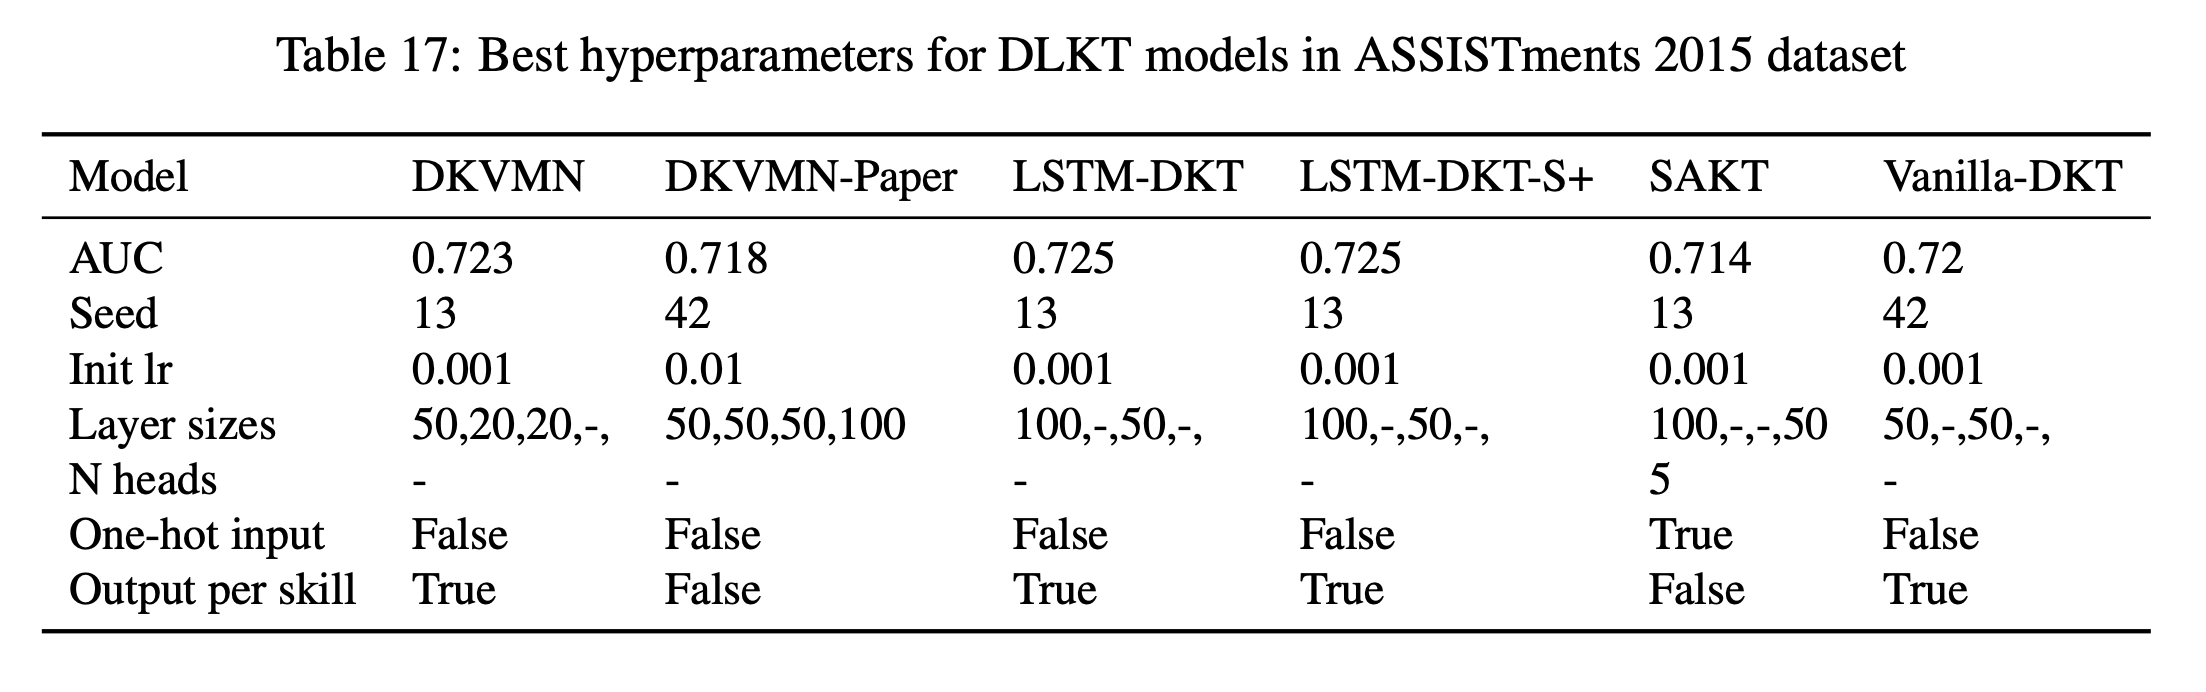

Some of the default were chosen by this reference : https://arxiv.org/pdf/2112.15072.pdf

In [5]:
%%writefile run.py

"""
Usage:
    run.py rnn --hidden=<h> [options]

Options:
    --length=<int>                      max length of attemps [default: 100]
    --questions=<int>                   num of question [default: 101]
    --lr=<float>                        learning rate [default: 0.001]
    --bs=<int>                          batch size [default: 64]
    --seed=<int>                        random seed [default: 42]
    --epochs=<int>                      number of epochs [default: 10]
    --cuda=<int>                        use GPU id [default: 0]
    --hidden=<int>                      dimension of hidden state [default: 128]
    --layers=<int>                      layers of rnn [default: 2]
    --dropout=<float>                   dropout rate [default: 0.1]
"""


import os
import random
import logging
import torch

import torch.optim as optim
import numpy as np

from datetime import datetime
from docopt import docopt
from Data.dataloader import getDataLoader
from Evaluation import eval


def setup_seed(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    torch.random.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


def main():

    args = docopt(__doc__)
    length = int(args['--length'])
    questions = int(args['--questions'])
    lr = float(args['--lr'])
    bs = int(args['--bs'])
    seed = int(args['--seed'])
    epochs = int(args['--epochs'])
    cuda = args['--cuda']
    hidden = int(args['--hidden'])
    layers = int(args['--layers'])
    dropout = float(args['--dropout'])
    model_type = 'RNN'

    logger = logging.getLogger('main')
    logger.setLevel(level=logging.DEBUG)
    setup_seed(seed)

    if torch.cuda.is_available():
        os.environ["CUDA_VISIBLE_DEVICES"] = cuda
        device = torch.device('cuda')
    else:
        device = torch.device('cpu')

    trainLoader, testLoader = getDataLoader(bs, questions, length)

    from model.DKT.RNNModel import RNNModel
    model = RNNModel(questions * 2, hidden, layers, questions, device)

    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_func = eval.lossFunc(questions, length, device)

    predicted_var = None  # Initialize a variable to store the predicted variable

    
    for epoch in range(epochs):
        print('epoch: ' + str(epoch))
        model, optimizer = eval.train_epoch(model, trainLoader, optimizer,
                                          loss_func, device)
        logger.info(f'epoch {epoch}')
        eval.test_epoch(model, testLoader, loss_func, device)

    # Save the model
    model_dir = 'Result'  
    os.makedirs(model_dir, exist_ok=True)
    model_path = os.path.join(model_dir, 'model.pth')
    torch.save(model.state_dict(), model_path)
    



if __name__ == '__main__':
    main()


   


Overwriting run.py


In [ ]:
!python run.py rnn --hidden=100


loading train data...


After running many times, I see the AUC score of the trained model is around 0.7 to 0.71. Precision is around 0.72 to 0.73. All of the evaluation seems to be weaker than other paper's implementation.

# Website

In [1]:
%%writefile Web.py 
import streamlit as st
import torch
from torch.optim import Adam
from model.DKT.RNNModel import RNNModel
from Data.dataloader import getDataLoader
import ast
from Evaluation import eval
import matplotlib.pyplot as plt

def main():
    st.title('Knowledge Tracing Model')

    # Description
    st.markdown("""
        ## Welcome to the Knowledge Tracing Model

        This web application allows you to use a pre-trained Knowledge Tracing Model to make predictions on test data.

        ### Model Parameters

        Use the sidebar to customize the model's architecture and hyperparameters.

        - **Batch Size:** Configure the batch size for training and prediction.
        - **Number of Epochs:** Set the number of training epochs.

        ### Load Data

        Click the 'Load Data' button to load the training and test data. The data will be loaded using the specified batch size.

        ### Run Model

        Once the data is loaded (Data loaded successfully!), click the 'Run Model' button to start the prediction on the test data. The model will make predictions and display the results.

        ### Probability of correctness

        After training the model, you can estimate the probability of correctness for a single question.

        ---
    """)

    # Parameters
    input_dim = 202
    hidden_dim = 100
    layer_dim = 2
    output_dim = 101
    batch_size = st.sidebar.number_input('Batch Size', min_value=1, step=1, value=64)
    num_epochs = st.sidebar.number_input('Number of Epochs', min_value=1, step=1, value=10)

    # Load the trained model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim, device)
    model.load_state_dict(torch.load('Result/model.pth'))
    model.to(device)

    # Load the data
    train_loader, test_loader = None, None

    if st.sidebar.button('Load Data'):
        with st.spinner("Loading data..."):
            train_loader, test_loader = getDataLoader(batch_size, output_dim, hidden_dim)
        st.success("Data loaded successfully!")

    # Perform prediction on the test data and display the results
    if st.sidebar.button('Run Model') and train_loader is not None and test_loader is not None:
        st.subheader("Prediction")
        prediction = eval.test_epoch(model, test_loader, eval.lossFunc(output_dim, hidden_dim, device), device)
        st.markdown(f"<p style='font-size: 18px;'>{prediction}</p>", unsafe_allow_html=True)
    
    def calculate_probability(model, question_index, test_loader):
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        # Get the previous response for the specified question index from the test dataset
        for data in test_loader:
            questions = data['question']
            responses = data['response']
            break
        
        # Find the response for the specified question index
        prev_response = responses[question_index - 1]

        # Convert previous response to a numeric value
        response_value = int(prev_response)

        # Create an input tensor with the given response value
        input_tensor = torch.tensor([[response_value]]).to(device)

        # Pass the input tensor through the model to get the output probabilities
        with torch.no_grad():
            output_probs = model(input_tensor)

        # Extract the probability for the specified question index
        question_probability = output_probs[0][question_index].item()

        return question_probability

    # Estimate the probability of correctness for a single question
    if st.sidebar.button('Probability of correctness'):
        st.subheader("Estimate Probability of Correctness")

        question_index = st.number_input("Enter the question index (from 1 to 100):", min_value=1, max_value=100, step=1)

        if question_index and test_loader is not None:
            probability = calculate_probability(model, question_index, test_loader)
            st.write(f"Probability of correctness for question {question_index}: {probability}")

    # Training loop
    if st.sidebar.button('Start Training') and train_loader is not None:
        st.subheader("Training Progress")
        optimizer = Adam(model.parameters())
        loss_func = eval.lossFunc(output_dim, hidden_dim, device)

        training_loss = []
        evaluation_auc = []
        evaluation_f1 = []
        evaluation_recall = []
        evaluation_precision = []

        st.write("Training progress:")
        for epoch in range(num_epochs):
            # Perform training
            model, optimizer, epoch_loss = eval.train_epoch(model, train_loader, optimizer, loss_func, device)
            training_loss.append(epoch_loss)

            # Perform evaluation
            auc, f1, recall, precision = eval.evaluate_model(model, test_loader, loss_func, device)
            evaluation_auc.append(auc)
            evaluation_f1.append(f1)
            evaluation_recall.append(recall)
            evaluation_precision.append(precision)

            # Display epoch information on Streamlit
            st.write(f"Epoch {epoch+1} completed")
            st.write(f"AUC: {auc:.4f} | F1: {f1:.4f} | Recall: {recall:.4f} | Precision: {precision:.4f}")

        # Visualize training loss and evaluation metrics
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        axes[0, 0].plot(training_loss)
        axes[0, 0].set_title("Training Loss")
        axes[0, 0].set_xlabel("Epoch")
        axes[0, 0].set_ylabel("Loss")
        axes[0, 1].plot(evaluation_auc)
        axes[0, 1].set_title("Evaluation AUC")
        axes[0, 1].set_xlabel("Epoch")
        axes[0, 1].set_ylabel("AUC")
        axes[1, 0].plot(evaluation_f1)
        axes[1, 0].set_title("Evaluation F1 Score")
        axes[1, 0].set_xlabel("Epoch")
        axes[1, 0].set_ylabel("F1 Score")
        axes[1, 1].plot(evaluation_recall, label="Recall")
        axes[1, 1].plot(evaluation_precision, label="Precision")
        axes[1, 1].set_title("Evaluation Recall and Precision")
        axes[1, 1].set_xlabel("Epoch")
        axes[1, 1].set_ylabel("Score")
        axes[1, 1].legend()

        st.subheader("Training Loss and Evaluation Metrics")
        st.pyplot(fig)

if __name__ == '__main__':
    main()


Overwriting Web.py


## Run the web 

In [ ]:
!Streamlit run Web.py --



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.16.0.2:8501

loading train data...
done: (17054, 100, 202)
loading test data...
done: (4048, 100, 202)
